In [1]:
%load_ext autoreload

%autoreload 2

%matplotlib inline


In [2]:
import numpy as np
import pandas as pd
import matplotlib, collections, itertools, os, re, textwrap, logging
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from functools import reduce

from logging.config import dictConfig
from logging import getLogger

dictConfig(dict(
    version = 1,
    formatters = {'f': {'format': '%(asctime)s %(name)-12s %(levelname)-8s %(message)s'}},
    handlers = {
        'h': {'class': 'logging.StreamHandler','formatter': 'f',
              'level': logging.DEBUG}},
    root = {'handlers': ['h'], 'level': logging.DEBUG,},
))

matplotlib_font = { 
    'size'   : 16 #, 'family' : 'normal', 'weight' : 'bold', 
}

matplotlib.rc('font', **matplotlib_font)
logger = getLogger('notebook')



In [3]:
import yt_misc_py as yt_misc

import rivas_decomposition_py as decomposition


In [4]:
repo_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath(os.getcwd()))))

out_dir = os.path.join(
    repo_dir, 'figs', os.path.basename(os.path.realpath(os.getcwd())),
)


In [5]:
d_all = decomposition.decomposition(os.path.join(
    repo_dir, 'private_data', 'npz', 'dev_allNonMHC_z_center_p0001_100PCs_20180129.npz'
))


2018-05-06 15:34:52,912 data_load_from_npz INFO     reading data from /Users/yosuke/repos/rivas-lab/decomposition/private_data/npz/dev_allNonMHC_z_center_p0001_100PCs_20180129.npz


In [6]:
phe_set = set(d_all.d['label_phe_code'])

npz_file    = os.path.join(repo_dir, 'notebook', 'figs', 'Fig4_PTVs', 'PheWAS.npz')
p_value_thr = 0.001
min_case_count = 1000


In [7]:
dfs = decomposition.PheWAS_data_loader(npz_file, phe_set, p_value_thr, min_case_count)


In [8]:
print(dfs.keys())
[len(x) for x in dfs.values()]


['GPR151', 'LIPT1', 'PDE3B']


[28, 18, 32]

In [9]:
PTV_name = 'PDE3B'
df = dfs[PTV_name]


In [10]:
font = {
#     'family' : 'normal',
#     'weight' : 'bold',
    'size'   : 18
}

matplotlib.rc('font', **font)


2018-05-06 15:35:51,899 plot_PheWAS_and_save INFO     saving to /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS11_PheWAS_PDE3B/figS11_PheWAS_PDE3B_bin.pdf
2018-05-06 15:35:52,491 plot_PheWAS_and_save INFO     saving to /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS11_PheWAS_PDE3B/figS11_PheWAS_PDE3B_bin.png


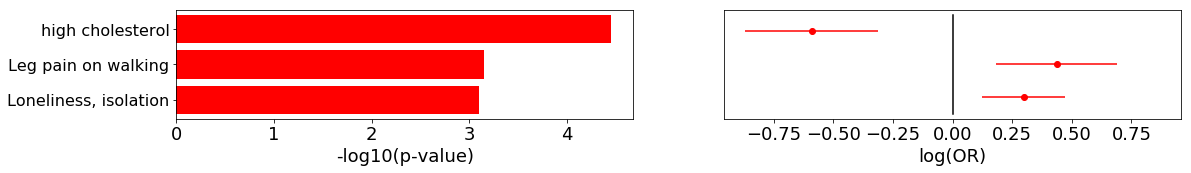

In [11]:
decomposition.plot_PheWAS_and_save(
    df[df['is_binary']], 
    out_dir,
    'figS11_PheWAS_{}_bin'.format(PTV_name), 
    'red', 'log(OR)', 
    figsize=(18,2)
)


2018-05-06 15:36:13,011 plot_PheWAS_and_save INFO     saving to /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS11_PheWAS_PDE3B/figS11_PheWAS_PDE3B_qt.pdf
2018-05-06 15:36:13,852 plot_PheWAS_and_save INFO     saving to /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS11_PheWAS_PDE3B/figS11_PheWAS_PDE3B_qt.png


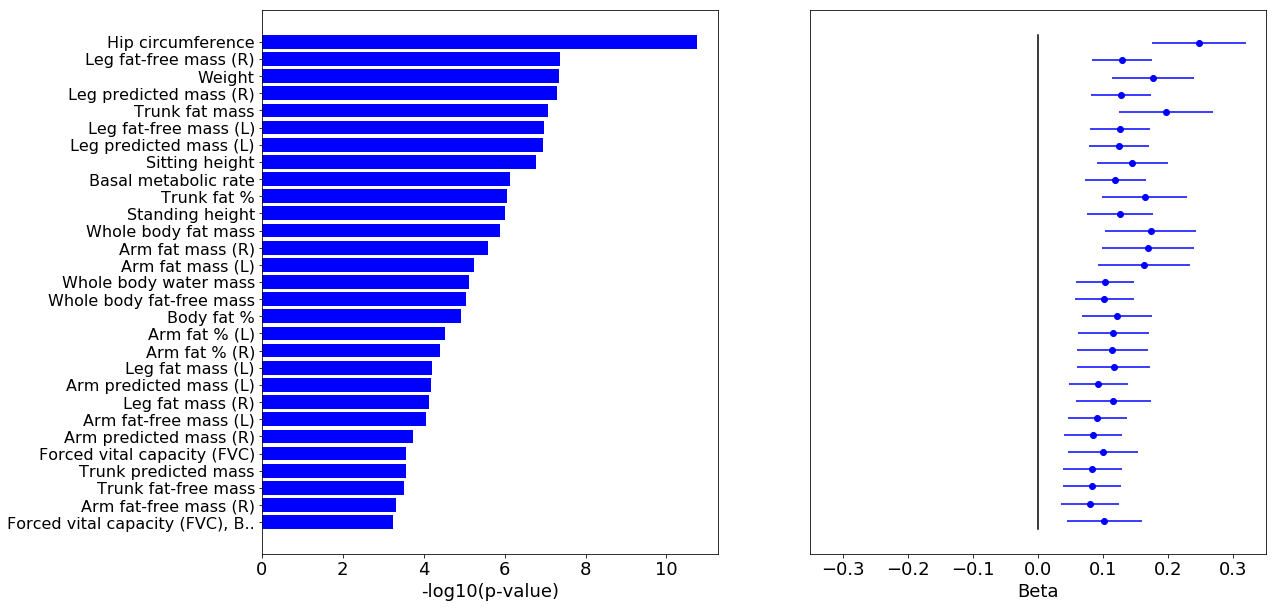

In [12]:
decomposition.plot_PheWAS_and_save(
    df[df['is_binary'].map(lambda x: not x)], 
    out_dir,
    'figS11_PheWAS_{}_qt'.format(PTV_name), 
    'blue', 'Beta', 
    figsize=(18,10)
)


In [13]:
df[['icd', 'Name', 'Case', 'l10pval', 'LOR', '196SE']]


,icd,Name,Case,l10pval,LOR,196SE
40,HC269,high_cholesterol,43054,4.457,-0.59040,0.279692
0,BIN4728,Leg_pain_on_walking,28151,3.154,0.43660,0.252448
1,BIN2020,"Loneliness,_isolation",60153,3.098,0.29830,0.174322
29,INI49,Hip_circumference,336620,10.750,0.24760,0.072167
18,INI23113,Leg_fat-free_mass_(right),331480,7.381,0.12930,0.046197
9,INI21002,Weight,336260,7.333,0.17690,0.063445
14,INI23114,Leg_predicted_mass_(right),331480,7.300,0.12760,0.045884
22,INI23128,Trunk_fat_mass,331295,7.079,0.19770,0.072304
17,INI23117,Leg_fat-free_mass_(left),331454,6.965,0.12590,0.046432
15,INI23118,Leg_predicted_mass_(left),331449,6.958,0.12490,0.046119
